In [2]:
import pandas as pd
import geopandas as gpd           # importing geopandas
import matplotlib.pyplot as plt

In [4]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [5]:
world.dtypes

pop_est          int64
continent       object
name            object
iso_a3          object
gdp_md_est     float64
geometry      geometry
dtype: object

In [6]:
# print the active geometry
world.geometry.name

'geometry'

In [10]:
# Renaming columns and setting geometry
world = world.rename(columns={'geometry':'borders'}).set_geometry('borders')

In [12]:
world.geometry.name

'borders'

# Plotting

<AxesSubplot:>

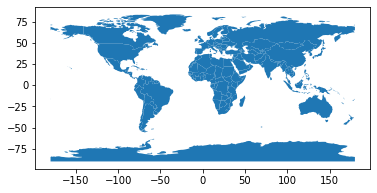

In [13]:
world.plot()

#  Choropleths
Geopandas makes it easy to create Choropleth maps (maps where the color of each shape is based on the value of an associated variable). Simply use the plot command with the column argument set to the column whose values you want to use to assign colors. We can also enable a legend using the legend parameter.

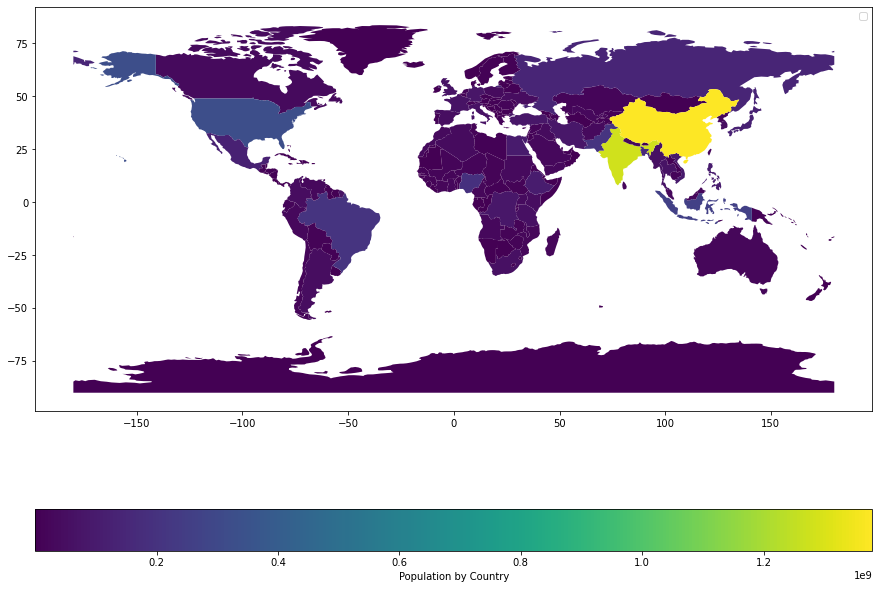

In [22]:
fig, ax = plt.subplots(figsize=(15,12))

world.plot(column='pop_est',
            ax=ax,
            legend=True,
            legend_kwds={'label':'Population by Country',
                         'orientation': "horizontal"})
plt.show()

# Filtering

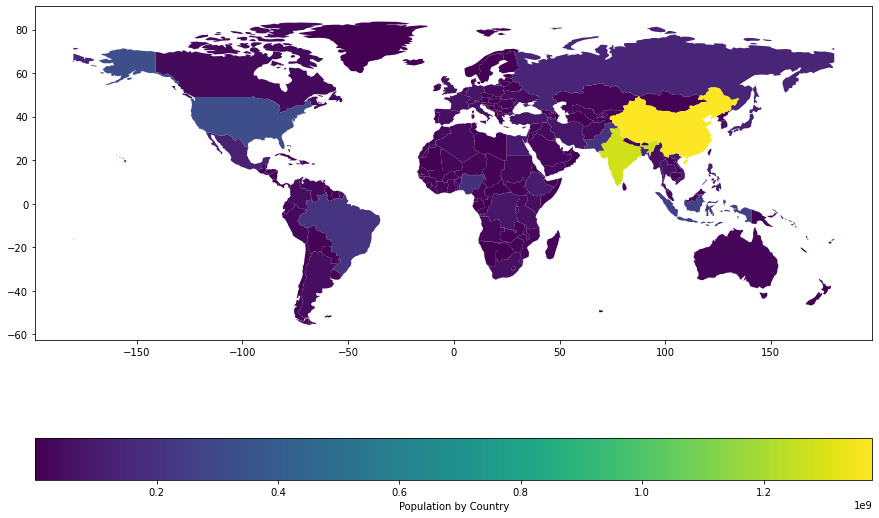

In [26]:
# filter the data-frame
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

# create the figure and axes
fig, ax = plt.subplots(figsize=(15,12))

# create the map
world.plot(column='pop_est', ax=ax, legend=True,
           legend_kwds={'label': "Population by Country",
                        'orientation': "horizontal"})
plt.show()


# Multi-layer maps

In [27]:
# Loading cities information
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [28]:
cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


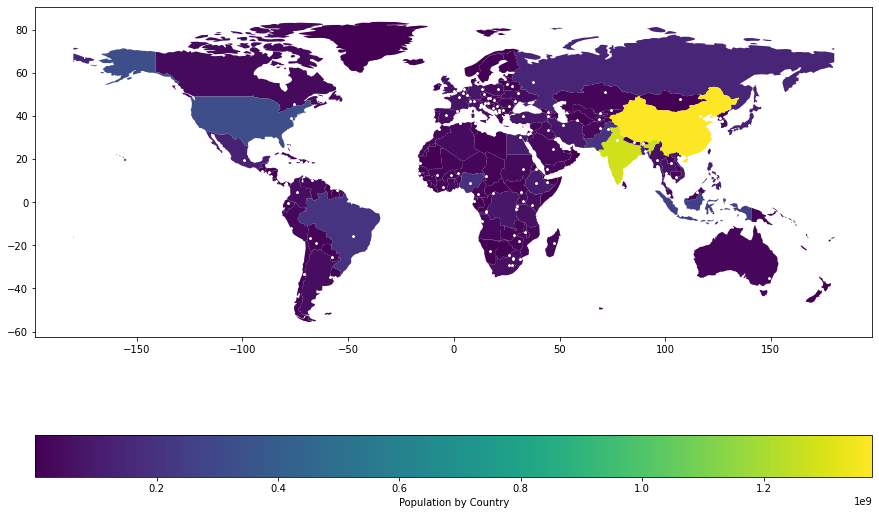

In [32]:
# create the figure and axes
fig, ax = plt.subplots(figsize=(15,12))

# a layer of countries
world.plot(column='pop_est', ax=ax, legend=True,
           legend_kwds={'label': "Population by Country",
                        'orientation': "horizontal"})

# a layer of cities
cities.plot(ax=ax ,marker='*', color='white', markersize=5)
plt.show()